**Бондаренко И.Г. ИУ5-61Б**

<a id='0'></a>
# Оглавление

2. [Задание](#1)<br>
3. [Описание датасета](#2)<br>
4. [Импорт библиотек](#3)<br>
5. [Загрузка и первичный анализ данных](#4)<br>
6. [Визуализация](#5)<br>
7. [Корреляционный анализ](#6)<br>

<a id="1"></a>
# Задание ([к оглавлению](#0))

>Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

>Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

>Необходимо подготовить отчет по рубежному контролю и разместить его в Вашем репозитории. Вы можете использовать титульный лист, или в начале ноутбука в текстовой ячейке указать Ваши Ф.И.О. и группу.

<a id="2"></a>
# Описание датасета ([к оглавлению](#0))

Датасет `Graduate Admission 2` создан для прогнозирования поступления в аспирантуру. Он состоит из двух таблиц:
- `Admission_Predict.csv`
- `Admission_Predict_Ver1.1.csv`

В текущей работе используется первый.

Таблица `Admission_Predict.csv` состоит из следующих столбцов:
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

<a id="3"></a>
# Импорт библиотек ([к оглавлению](#0))

In [29]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id="4"></a>
# Загрузка и первичный анализ данных ([к оглавлению](#0))

In [30]:
data = pd.read_csv("Admission_Predict.csv", sep=",")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [31]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [32]:
data.shape

(400, 9)

In [33]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [34]:
# Количество пустых значений
total_count = data.shape[0]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    temp_perc = round((temp_null_count / total_count) * 100.0, 2)
    print('Колонка {} – {}, {}%'.format(col, temp_null_count, temp_perc))    

Колонка Serial No. – 0, 0.0%
Колонка GRE Score – 0, 0.0%
Колонка TOEFL Score – 0, 0.0%
Колонка University Rating – 0, 0.0%
Колонка SOP – 0, 0.0%
Колонка LOR  – 0, 0.0%
Колонка CGPA – 0, 0.0%
Колонка Research – 0, 0.0%
Колонка Chance of Admit  – 0, 0.0%


In [ ]:
data.rename()

<a id="5"></a>
# Визуализация ([к оглавлению](#0))

In [36]:
# Удалим столбец ID, он неинформативен
df = data.drop('Serial No.', axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


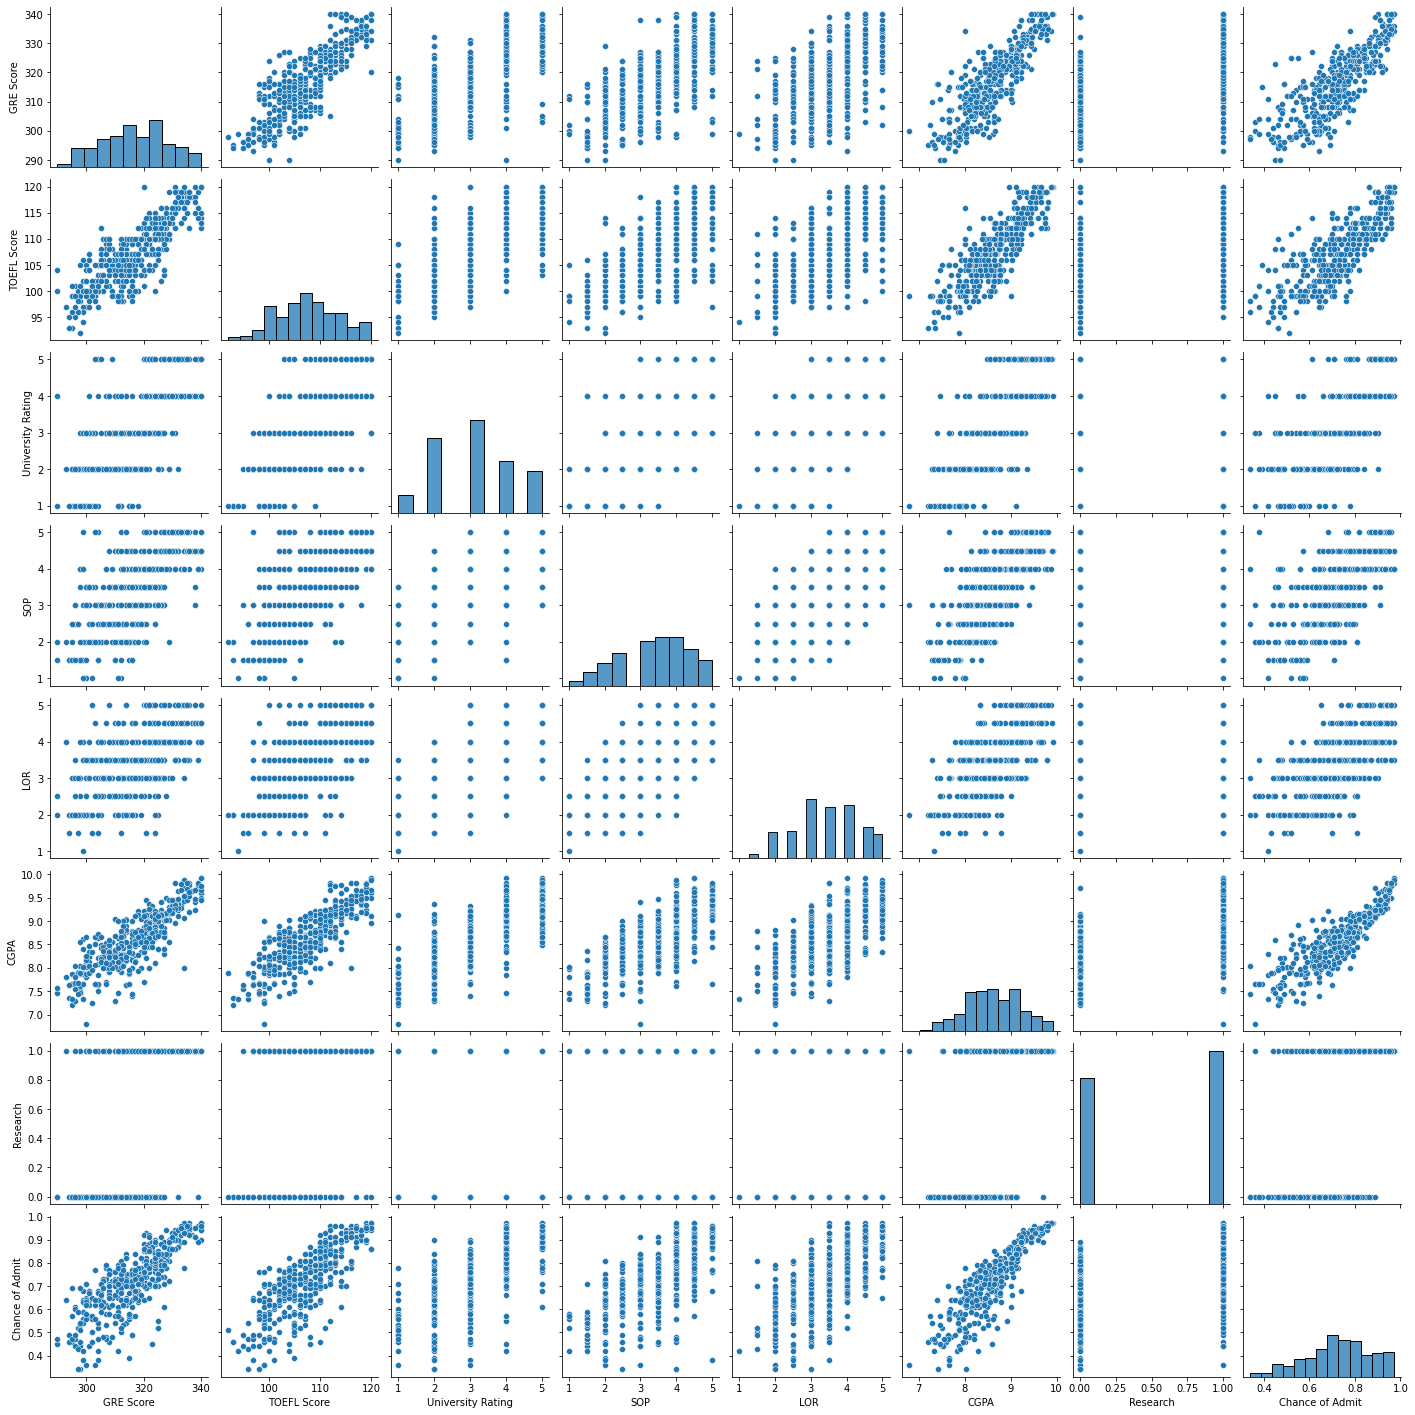

In [37]:
sns.pairplot(df)

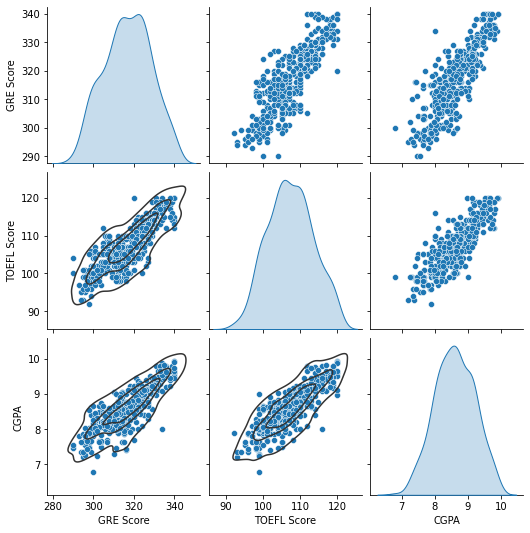

In [40]:
g = sns.pairplot(
    df,
    vars=['GRE Score', 'TOEFL Score', 'CGPA'],
    diag_kind='kde'
)
g.map_lower(sns.kdeplot, levels=4, color=".2")

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

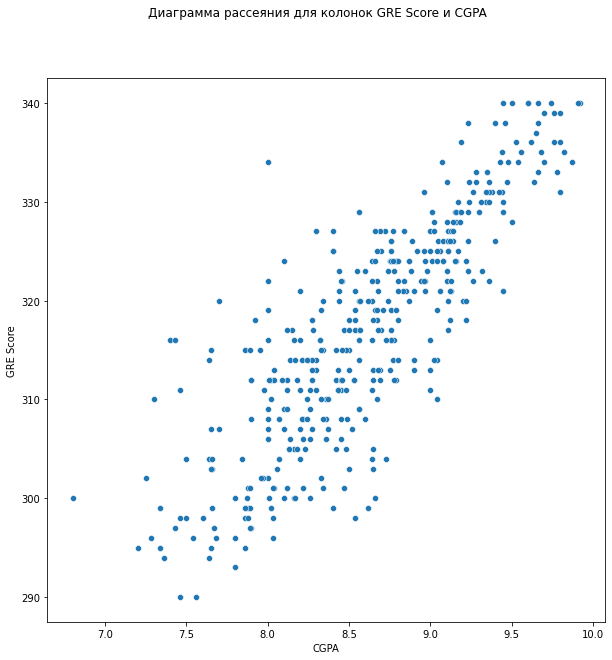

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle("Диаграмма рассеяния для колонок GRE Score и CGPA")
sns.scatterplot(ax=ax, x='CGPA', y='GRE Score', data=data)

<a id="6"></a>
# Корреляционный анализ ([к оглавлению](#0))

In [42]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [44]:
df.corr()['CGPA']

GRE Score            0.833060
TOEFL Score          0.828417
University Rating    0.746479
SOP                  0.718144
LOR                  0.670211
CGPA                 1.000000
Research             0.521654
Chance of Admit      0.873289
Name: CGPA, dtype: float64

<AxesSubplot:>

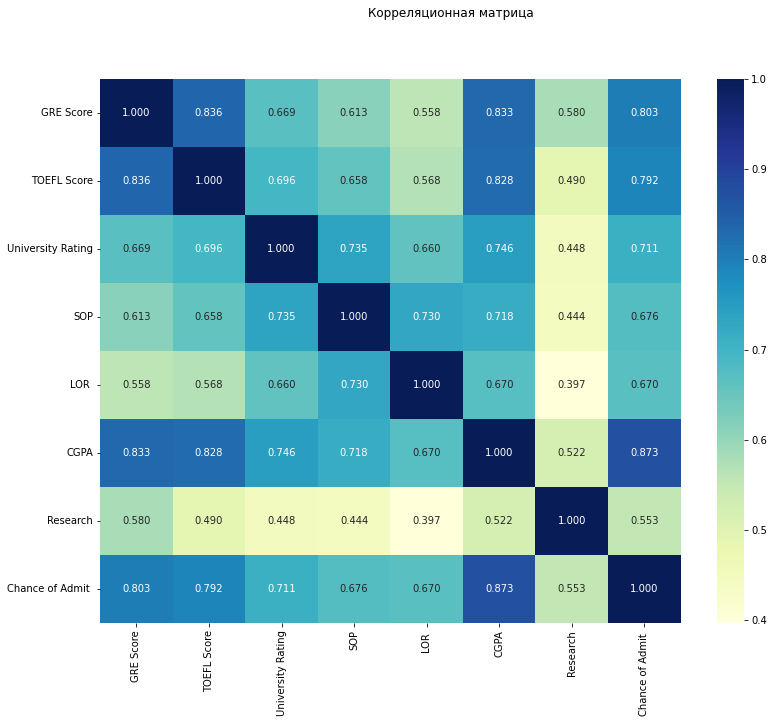

In [45]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(13,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f', cmap='YlGnBu')

На основе корреляционной матрицы можно сделать следующие выводы.

Все признаки достаточно хорошо коррелируют с целевым признаокм `CGPA`:

|Признак|Корреляция|
| :- | :-: |
|GRE Score|0.833060|
|TOEFL Score|0.828417|
|University Rating|0.746479|
|SOP|0.718144|
|LOR|0.670211|
|CGPA|1.000000|
|Research|0.521654|
|Chance of Admit|0.873289|

Признаки `GRE Score`, `TOEFL Score`, `Chance of Admit` сильно коррелируют между собой, следовательно, для того, чтобы повысить качество модели, стоит выбрать из них только один, который наиболее сильно коррелирует с целевым признаком, т.е. `Chance of Admit`.

Таким образом, для построения модели использовались бы следующие признаки: `University Rating`, `SOP`, `LOR`, `CGPA`, `Research`. 